In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
rhpass=pd.read_csv("escalating.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,62,4764 > 139 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
1,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,TCP,62,"139 > 4764 [SYN, ACK] Seq=0 Ack=1 Win=17520 Le..."
2,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,60,4764 > 139 [ACK] Seq=1 Ack=1 Win=17520 Len=0
3,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,NBSS,126,"Session request, to XP<20> from ZEBRA<00>"
4,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,NBSS,60,Positive session response


In [19]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [20]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,62,4764 > 139 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
1,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,TCP,62,"139 > 4764 [SYN, ACK] Seq=0 Ack=1 Win=17520 Le...",Server
2,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,60,4764 > 139 [ACK] Seq=1 Ack=1 Win=17520 Len=0,Client
3,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,NBSS,126,"Session request, to XP<20> from ZEBRA<00>",Client
4,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,NBSS,60,Positive session response,Server


In [21]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,62,2012-08-06 14:14:14,4764 > 139 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
1,62,2012-08-06 14:14:14,"139 > 4764 [SYN, ACK] Seq=0 Ack=1 Win=17520 Le..."
2,60,2012-08-06 14:14:14,4764 > 139 [ACK] Seq=1 Ack=1 Win=17520 Len=0
3,126,2012-08-06 14:14:14,"Session request, to XP<20> from ZEBRA<00>"
4,60,2012-08-06 14:14:14,Positive session response


In [22]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2012-08-06 14:14:14,62,4764 > 139 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
2012-08-06 14:14:14,62,"139 > 4764 [SYN, ACK] Seq=0 Ack=1 Win=17520 Le..."
2012-08-06 14:14:14,60,4764 > 139 [ACK] Seq=1 Ack=1 Win=17520 Len=0
2012-08-06 14:14:14,126,"Session request, to XP<20> from ZEBRA<00>"
2012-08-06 14:14:14,60,Positive session response


In [23]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2012-08-06 14:14:00,175142
2012-08-06 14:15:00,20895
2012-08-06 14:16:00,27652
2012-08-06 14:17:00,47144
2012-08-06 14:18:00,291465


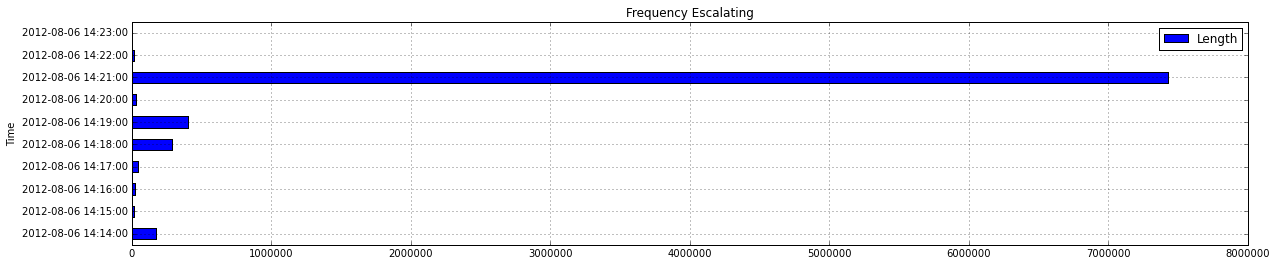

In [24]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Escalating",figsize=(20,4),legend=True)

In [25]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi DOS.png")

In [26]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,62,4764 > 139 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
1,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,TCP,62,"139 > 4764 [SYN, ACK] Seq=0 Ack=1 Win=17520 Le...",Server
2,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,TCP,60,4764 > 139 [ACK] Seq=1 Ack=1 Win=17520 Len=0,Client
3,2012-08-06 14:14:14,10.10.10.25,10.10.10.15,NBSS,126,"Session request, to XP<20> from ZEBRA<00>",Client
4,2012-08-06 14:14:14,10.10.10.15,10.10.10.25,NBSS,60,Positive session response,Server


In [27]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination     Protocol        
0.0.0.0     255.255.255.255 DHCP        2052
10.10.10.15 10.10.10.25     DCERPC     16102
                            HTTP         201
                            LANMAN       454
                            LSARPC     44896

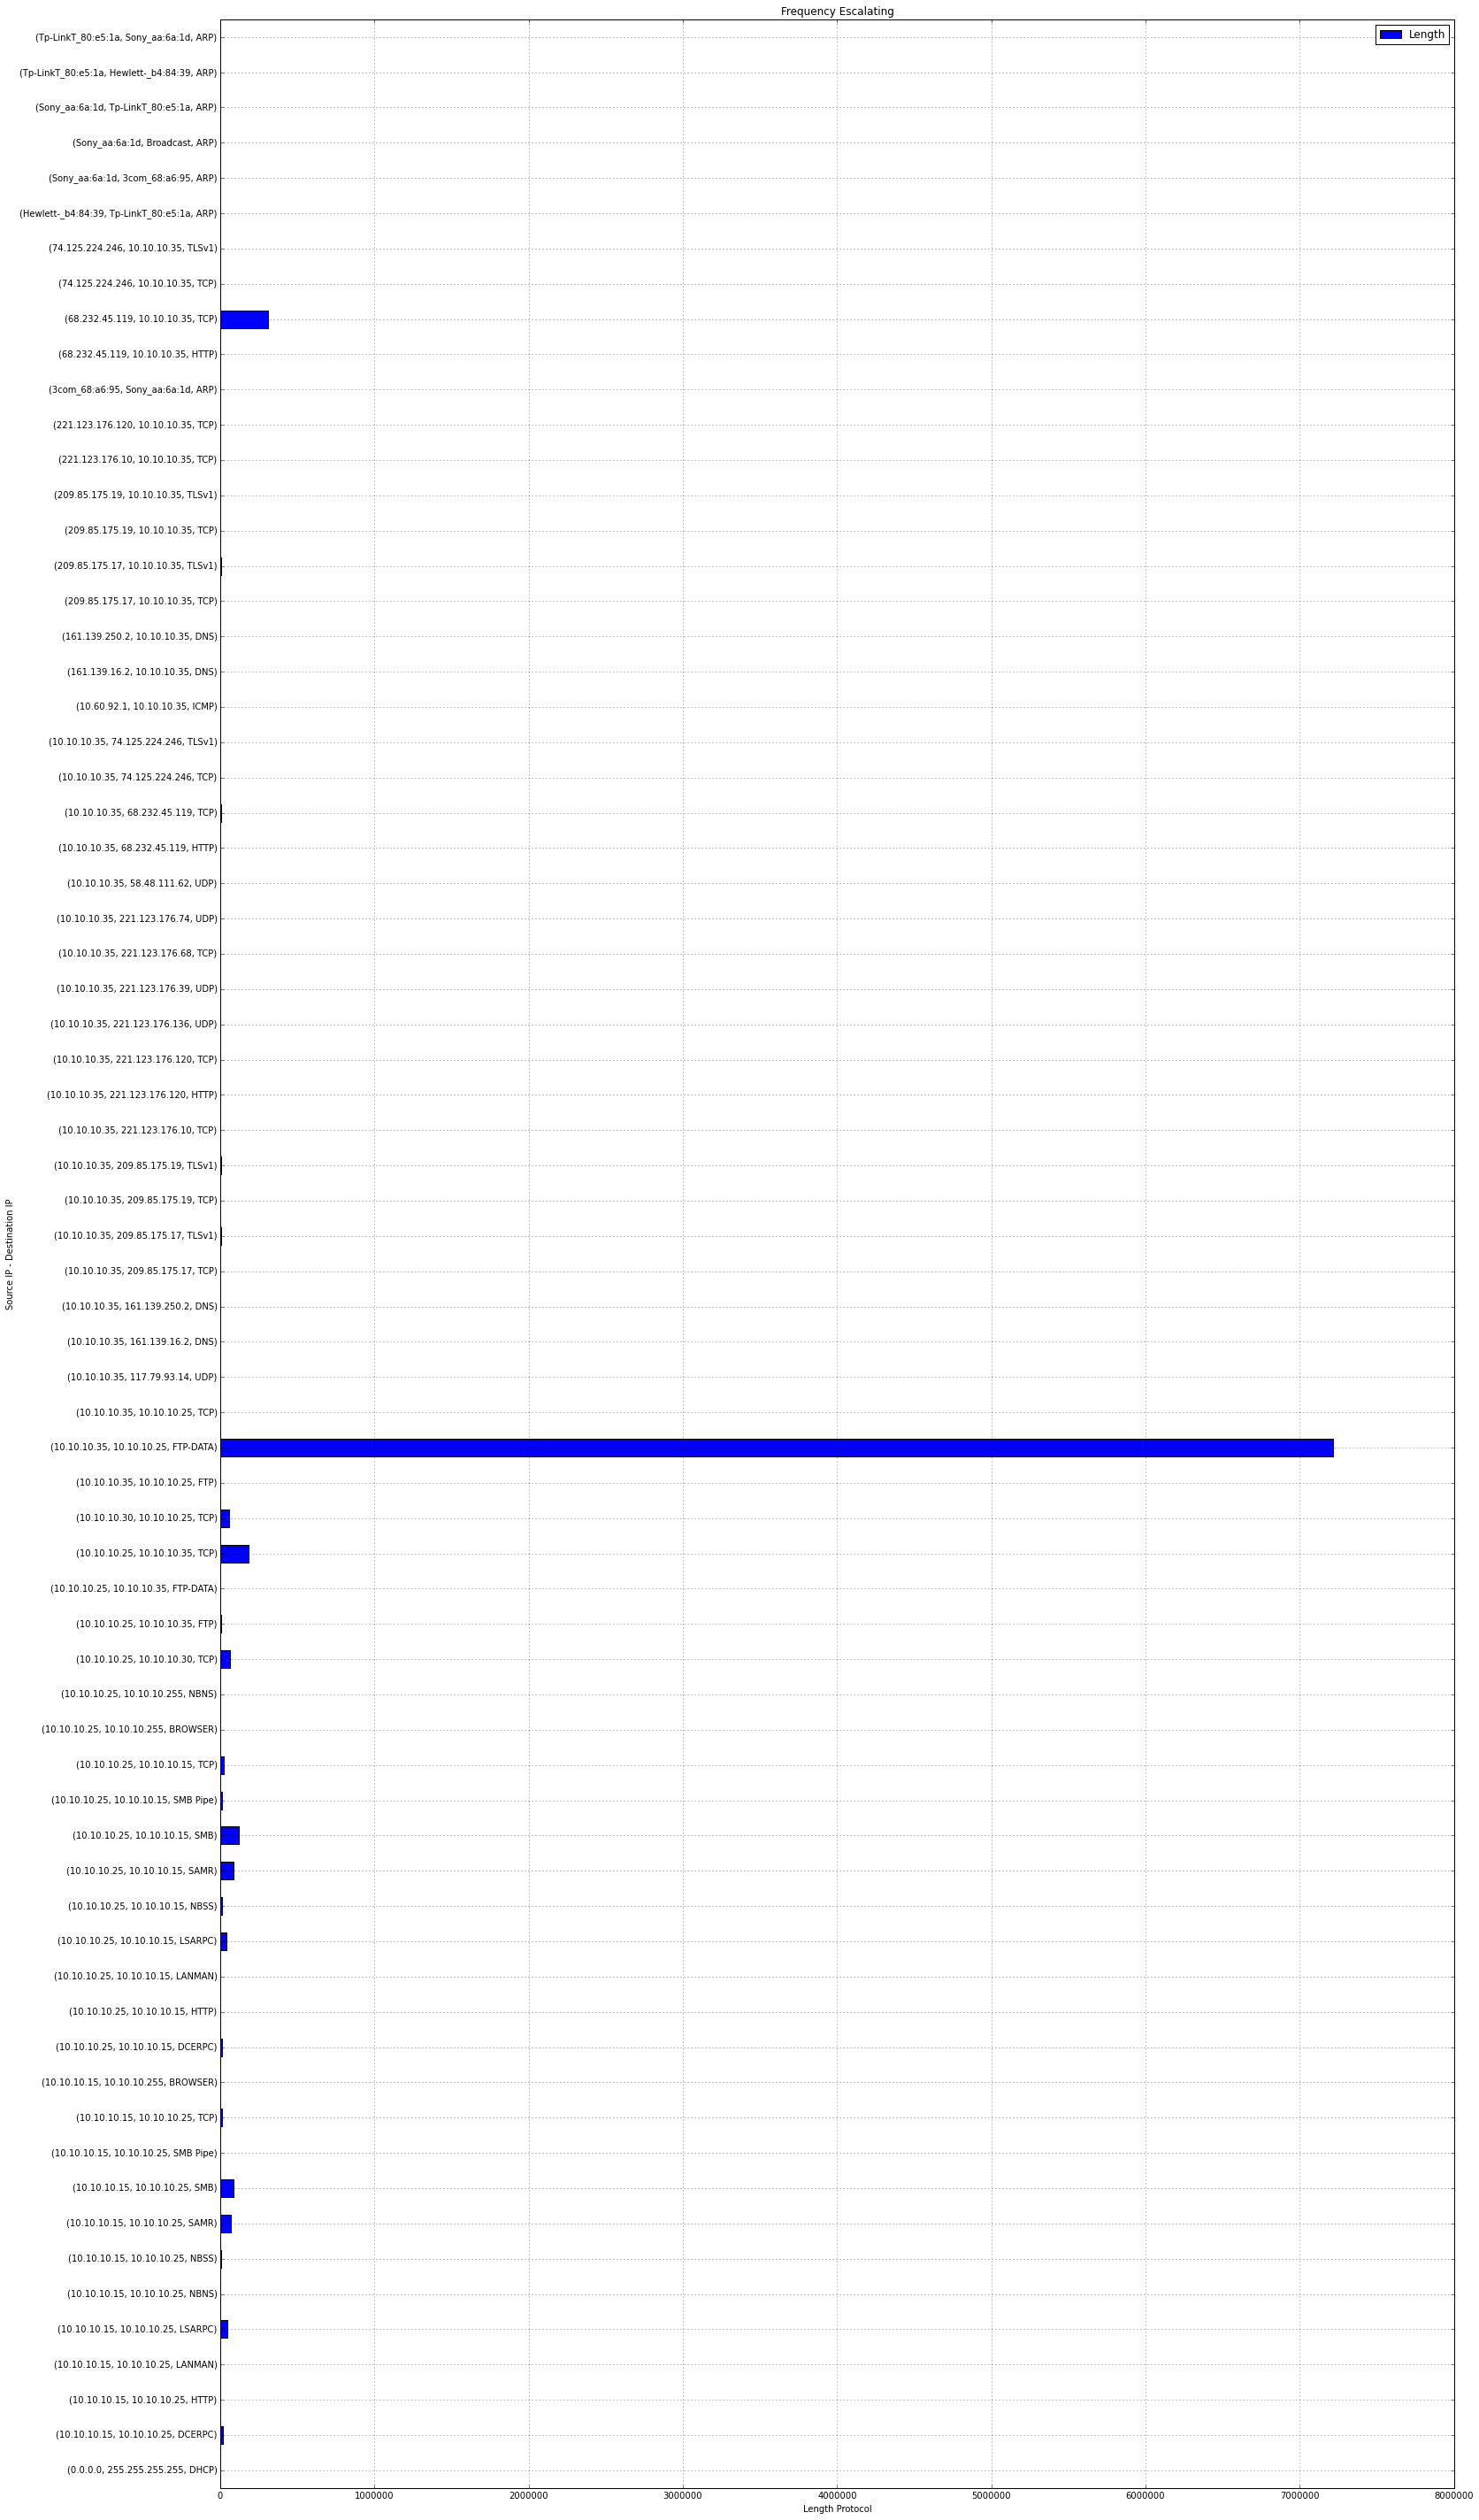

In [28]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Escalating",figsize=(25,50))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [29]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi escalating.png")